In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
%matplotlib inline

# Data Pre-processing

In [2]:
#Read Data
data = pd.read_csv("C:\\Users\\nidhi19\\OneDrive - York University\\Documents\\Varun\\CIND 820 Project\\COVID19 cases - June 30th.csv")
#check for null value
print(data.isnull().sum())

_id                          0
Assigned_ID                  0
Outbreak Associated          0
Age Group                   98
Neighbourhood Name        2741
FSA                       1344
Source of Infection          0
Classification               0
Episode Date                 0
Reported Date                0
Client Gender                0
Outcome                      0
Currently Hospitalized       0
Currently in ICU             0
Currently Intubated          0
Ever Hospitalized            0
Ever in ICU                  0
Ever Intubated               0
dtype: int64


In [3]:
# Check Data type
data.dtypes

_id                        int64
Assigned_ID                int64
Outbreak Associated       object
Age Group                 object
Neighbourhood Name        object
FSA                       object
Source of Infection       object
Classification            object
Episode Date              object
Reported Date             object
Client Gender             object
Outcome                   object
Currently Hospitalized    object
Currently in ICU          object
Currently Intubated       object
Ever Hospitalized         object
Ever in ICU               object
Ever Intubated            object
dtype: object

In [4]:
# Check  data info
data.info

<bound method DataFrame.info of             _id  Assigned_ID Outbreak Associated       Age Group  \
0       2719889            1            Sporadic  50 to 59 Years   
1       2719890            2            Sporadic  50 to 59 Years   
2       2719891            3            Sporadic  20 to 29 Years   
3       2719892            4            Sporadic  60 to 69 Years   
4       2719893            5            Sporadic  60 to 69 Years   
...         ...          ...                 ...             ...   
169763  2889652       175224            Sporadic  40 to 49 Years   
169764  2889653       175225            Sporadic  40 to 49 Years   
169765  2889654       175226            Sporadic  30 to 39 Years   
169766  2889655       175227            Sporadic  60 to 69 Years   
169767  2889656       175228            Sporadic  50 to 59 Years   

                       Neighbourhood Name  FSA Source of Infection  \
0                         Willowdale East  M2N              Travel   
1          

In [5]:
#Drop missing values
data = data.dropna().reset_index()
#Drop unneccessary columns to reduce noise 
data = data.drop(columns=['index', '_id', 'Assigned_ID'])
data.head()

,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


In [6]:
# To find earlist episode and reported date
print('Earliest episode date: ', data['Episode Date'].min())
print('Latest episode date: ', data['Episode Date'].max())
print('Earliest reported date: ', data['Reported Date'].min())
print('Latest reported date: ', data['Reported Date'].min())

Earliest episode date:  2020-01-21
Latest episode date:  2021-06-28
Earliest reported date:  2020-01-23
Latest reported date:  2020-01-23


In [7]:
# Convert date object into actual date format
data['Episode Date'] = pd.to_datetime(data['Episode Date'])
# count number of days since the first event occur
data['Episode Date'] = (data['Episode Date'] - data['Episode Date'].min()).dt.days

data['Reported Date'] = pd.to_datetime(data['Reported Date'])
data['Reported Date'] = (data['Reported Date'] - data['Reported Date'].min()).dt.days

In [8]:
data.head(5)

,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,1,0,FEMALE,RESOLVED,No,No,No,No,No,No
1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,0,0,MALE,RESOLVED,No,No,No,Yes,No,No
2,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,15,29,FEMALE,RESOLVED,No,No,No,No,No,No
3,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,26,33,FEMALE,RESOLVED,No,No,No,No,No,No
4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,30,34,MALE,RESOLVED,No,No,No,No,No,No


# Algorithms only work with numbers, therefore, we have to convert all categorical data into numerical values.

In [9]:
# To convert categorical data into numerical values, I use ordinal encoder from ski learn library 
# which can encode categorical features as an integer array.
data_encoded = data.copy()
for col in data.columns:
    data_encoded["Encoded_"+col] = ord_enc.fit_transform(data[[col]])

In [10]:
data_encoded[['Encoded_Outbreak Associated',
       'Encoded_Age Group', 'Encoded_Neighbourhood Name', 'Encoded_FSA',
       'Encoded_Source of Infection', 'Encoded_Classification',
       'Encoded_Episode Date', 'Encoded_Reported Date',
       'Encoded_Client Gender', 'Encoded_Outcome',
       'Encoded_Currently Hospitalized', 'Encoded_Currently in ICU',
       'Encoded_Currently Intubated', 'Encoded_Ever Hospitalized',
       'Encoded_Ever in ICU', 'Encoded_Ever Intubated']].head(5)

,Encoded_Outbreak Associated,Encoded_Age Group,Encoded_Neighbourhood Name,Encoded_FSA,Encoded_Source of Infection,Encoded_Classification,Encoded_Episode Date,Encoded_Reported Date,Encoded_Client Gender,Encoded_Outcome,Encoded_Currently Hospitalized,Encoded_Currently in ICU,Encoded_Currently Intubated,Encoded_Ever Hospitalized,Encoded_Ever in ICU,Encoded_Ever Intubated
0,1.0,4.0,129.0,22.0,8.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,4.0,129.0,22.0,8.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,95.0,25.0,8.0,0.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,5.0,23.0,50.0,8.0,0.0,7.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,5.0,23.0,50.0,8.0,0.0,8.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Distribution 

Outbreak associated

Sporadic               145924
Outbreak Associated     21039
Name: Outbreak Associated, dtype: int64


<BarContainer object of 2 artists>

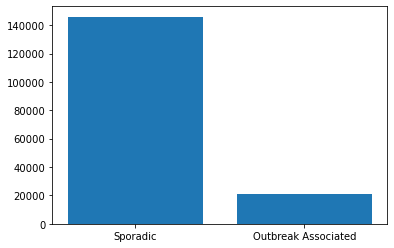

In [11]:
z = data_encoded['Outbreak Associated'].value_counts()
print(z)
plt.bar(z.keys(), z)

Age Group

20 to 29 Years    34093
30 to 39 Years    28683
19 and younger    24390
40 to 49 Years    24142
50 to 59 Years    24099
60 to 69 Years    15151
70 to 79 Years     7545
80 to 89 Years     5735
90 and older       3125
Name: Age Group, dtype: int64


<function print>

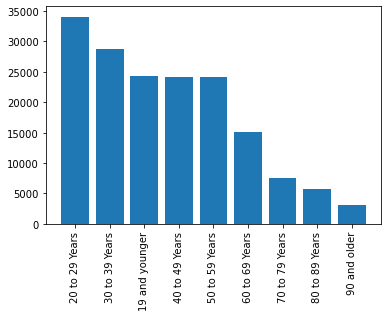

In [12]:
z = data_encoded['Age Group'].value_counts()
print(z)
plt.bar(z.keys(), z)
plt.xticks(rotation=90)
print

Neighbourhood Name

Woburn                               4616
Downsview-Roding-CFB                 4501
West Humber-Clairville               4080
Mount Olive-Silverstone-Jamestown    4047
Malvern                              3893
                                     ... 
North Riverdale                       251
Kingsway South                        247
Forest Hill South                     240
Bridle Path-Sunnybrook-York Mills     233
Runnymede-Bloor West Village          201
Name: Neighbourhood Name, Length: 140, dtype: int64


<function print>

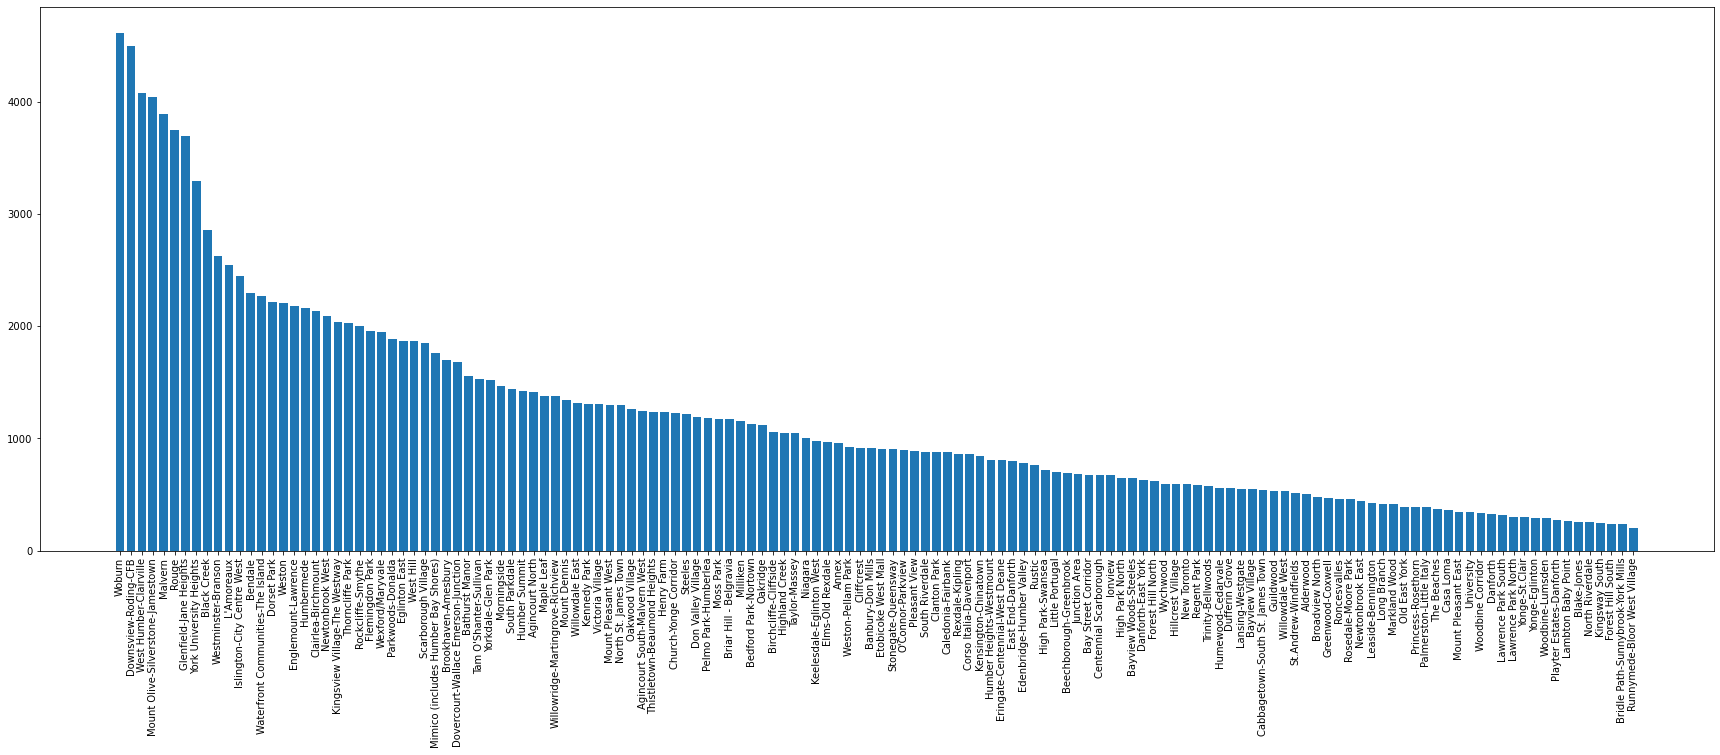

In [13]:
z = data_encoded['Neighbourhood Name'].value_counts().sort_values(ascending = False)
print(z)
plt.figure(figsize=(30,10))
plt.bar(z.keys(), z)
plt.xticks(rotation=90)
print

Source of Infection

Community                             56624
No Information                        43839
Household Contact                     31535
Outbreaks, Healthcare Institutions    11509
Close Contact                         11502
Outbreaks, Other Settings              7574
Outbreaks, Congregate Settings         2241
Travel                                 1894
Pending                                 245
Name: Source of Infection, dtype: int64


<function print>

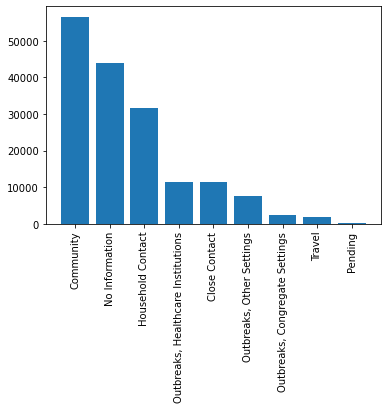

In [14]:
z = data_encoded['Source of Infection'].value_counts()
print(z)
plt.bar(z.keys(), z)
plt.xticks(rotation=90)
print

Classification

CONFIRMED    162439
PROBABLE       4524
Name: Classification, dtype: int64


<function print>

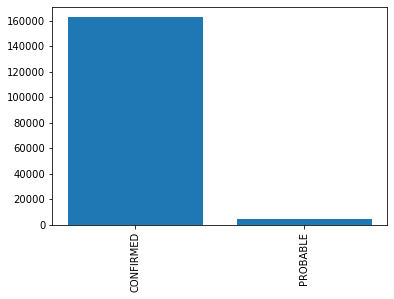

In [15]:
z = data_encoded['Classification'].value_counts()
print(z)
plt.bar(z.keys(), z)
plt.xticks(rotation=90)
print

Gender

FEMALE                        82483
MALE                          81789
UNKNOWN                        2620
OTHER                            21
TRANSGENDER                      21
NON-BINARY                       21
TRANS MAN                         3
NOT LISTED, PLEASE SPECIFY        3
TRANS WOMAN                       2
Name: Client Gender, dtype: int64


<function print>

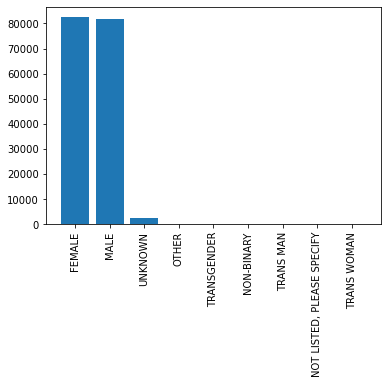

In [16]:
z = data_encoded['Client Gender'].value_counts()
print(z)
plt.bar(z.keys(), z)
plt.xticks(rotation=90)
print

Outcome

RESOLVED    162772
FATAL         3495
ACTIVE         696
Name: Outcome, dtype: int64


<function print>

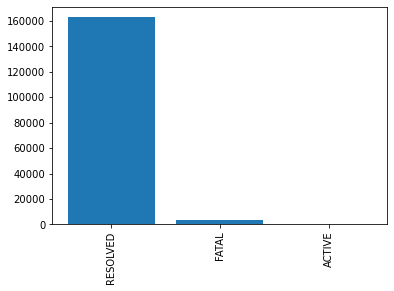

In [17]:
z = data_encoded['Outcome'].value_counts()
print(z)
plt.bar(z.keys(), z)
plt.xticks(rotation=90)
print

Episode Date

441    1404
454    1343
442    1342
440    1317
449    1314
       ... 
26        1
15        1
34        1
11        1
0         1
Name: Episode Date, Length: 499, dtype: int64


<function print>

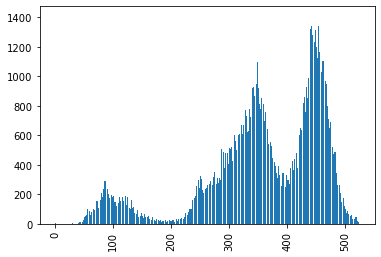

In [18]:
z = data_encoded['Episode Date'].value_counts()
print(z)
plt.bar(z.keys(), z)
plt.xticks(rotation=90)
print

Reported Date

350    1622
450    1500
447    1426
448    1413
456    1366
       ... 
37        1
36        1
35        1
34        1
29        1
Name: Reported Date, Length: 494, dtype: int64


<function print>

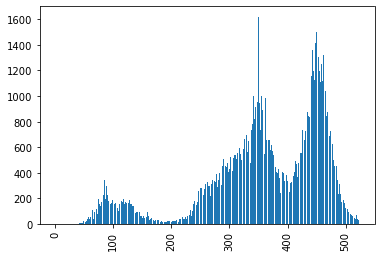

In [19]:
z = data_encoded['Reported Date'].value_counts()
print(z)
plt.bar(z.keys(), z)
plt.xticks(rotation=90)
print

# Exploratory Data Analysis

Pairplot for Feature Class Distribution

A pairs plot allows us to see both distribution of single variables and relationships between two variables.
This tells us how informative a feature is in distinguishing the two classes

In [20]:
data_encoded.columns

Index(['Outbreak Associated', 'Age Group', 'Neighbourhood Name', 'FSA',
       'Source of Infection', 'Classification', 'Episode Date',
       'Reported Date', 'Client Gender', 'Outcome', 'Currently Hospitalized',
       'Currently in ICU', 'Currently Intubated', 'Ever Hospitalized',
       'Ever in ICU', 'Ever Intubated', 'Encoded_Outbreak Associated',
       'Encoded_Age Group', 'Encoded_Neighbourhood Name', 'Encoded_FSA',
       'Encoded_Source of Infection', 'Encoded_Classification',
       'Encoded_Episode Date', 'Encoded_Reported Date',
       'Encoded_Client Gender', 'Encoded_Outcome',
       'Encoded_Currently Hospitalized', 'Encoded_Currently in ICU',
       'Encoded_Currently Intubated', 'Encoded_Ever Hospitalized',
       'Encoded_Ever in ICU', 'Encoded_Ever Intubated'],
      dtype='object')

In [22]:
def feature_class_distribution(feature, class_name):
    ip = feature
    cols = ['Encoded_'+ip,class_name]
    tmp = data_encoded[[ip, 'Encoded_'+ip]]
    tmp = tmp.drop_duplicates()
    sns.pairplot(data_encoded[cols], hue = class_name, diag_kws={'bw':0.1})
    print(tmp)

# Ever Hospitalized 

Outbreak Associated and Ever Hospitalized

    Outbreak Associated  Encoded_Outbreak Associated
0              Sporadic                          1.0
17  Outbreak Associated                          0.0


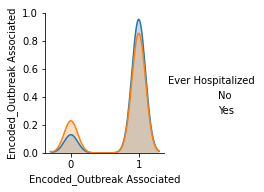

In [23]:
feature_class_distribution('Outbreak Associated', 'Ever Hospitalized')

Age group and Ever Hospitalized

          Age Group  Encoded_Age Group
0    50 to 59 Years                4.0
2    20 to 29 Years                1.0
3    60 to 69 Years                5.0
6    80 to 89 Years                7.0
10   70 to 79 Years                6.0
13   30 to 39 Years                2.0
14   40 to 49 Years                3.0
28   19 and younger                0.0
258    90 and older                8.0


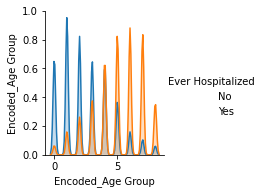

In [24]:
feature_class_distribution('Age Group', 'Ever Hospitalized')

Neighbourhood Name and Ever Hospitalized

            Neighbourhood Name  Encoded_Neighbourhood Name
0              Willowdale East                       129.0
2            Parkwoods-Donalda                        95.0
3        Church-Yonge Corridor                        23.0
5             Newtonbrook West                        86.0
6                     Milliken                        76.0
...                        ...                         ...
947   Humber Heights-Westmount                        53.0
994                     Rustic                       107.0
1003         Hillcrest Village                        52.0
1018                 Alderwood                         2.0
1059             Old East York                        93.0

[140 rows x 2 columns]


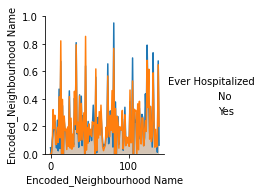

In [25]:
feature_class_distribution('Neighbourhood Name', 'Ever Hospitalized')

Source of Infection and Ever Hospitalized

                      Source of Infection  Encoded_Source of Infection
0                                  Travel                          8.0
13                              Community                          1.0
17         Outbreaks, Congregate Settings                          4.0
24                          Close Contact                          0.0
68                      Household Contact                          2.0
134                        No Information                          3.0
189    Outbreaks, Healthcare Institutions                          5.0
260             Outbreaks, Other Settings                          6.0
39842                             Pending                          7.0


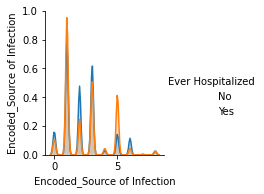

In [26]:
feature_class_distribution('Source of Infection', 'Ever Hospitalized')

Episode Date and Ever Hospitalized

        Episode Date  Encoded_Episode Date
0                  1                   1.0
1                  0                   0.0
2                 15                   4.0
3                 26                   7.0
4                 30                   8.0
...              ...                   ...
166752           520                 494.0
166826           521                 495.0
166865           522                 496.0
166914           523                 497.0
166935           524                 498.0

[499 rows x 2 columns]


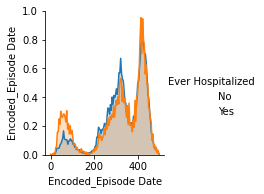

In [27]:
feature_class_distribution('Episode Date', 'Ever Hospitalized')

Reported Date and Ever Hospitalization 

        Reported Date  Encoded_Reported Date
0                   0                    0.0
2                  29                    2.0
3                  33                    3.0
4                  34                    4.0
5                  35                    5.0
...               ...                    ...
166775            519                  489.0
166845            520                  490.0
166878            521                  491.0
166912            522                  492.0
166947            523                  493.0

[494 rows x 2 columns]


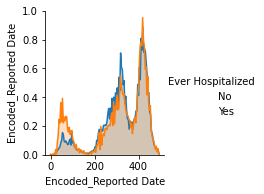

In [28]:
feature_class_distribution('Reported Date', 'Ever Hospitalized')

Client Gender and Ever Hospitalization 

                     Client Gender  Encoded_Client Gender
0                           FEMALE                    0.0
1                             MALE                    1.0
165                        UNKNOWN                    8.0
2660                         OTHER                    4.0
7651                   TRANSGENDER                    7.0
87588                   NON-BINARY                    2.0
120468                 TRANS WOMAN                    6.0
124748  NOT LISTED, PLEASE SPECIFY                    3.0
127497                   TRANS MAN                    5.0


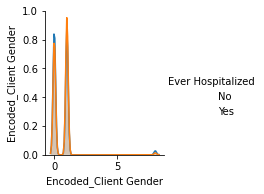

In [29]:
feature_class_distribution('Client Gender', 'Ever Hospitalized')

Outcome and Ever Hospitazation 

        Outcome  Encoded_Outcome
0      RESOLVED              2.0
75        FATAL              1.0
21017    ACTIVE              0.0


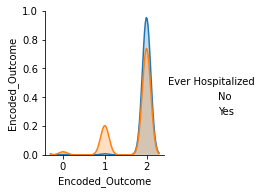

In [30]:
feature_class_distribution('Outcome', 'Ever Hospitalized')

# Ever in ICU

Outbreak associated and Ever in ICU

    Outbreak Associated  Encoded_Outbreak Associated
0              Sporadic                          1.0
17  Outbreak Associated                          0.0


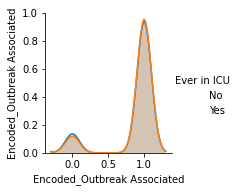

In [31]:
feature_class_distribution('Outbreak Associated', 'Ever in ICU')

Age Group and Ever in ICU

          Age Group  Encoded_Age Group
0    50 to 59 Years                4.0
2    20 to 29 Years                1.0
3    60 to 69 Years                5.0
6    80 to 89 Years                7.0
10   70 to 79 Years                6.0
13   30 to 39 Years                2.0
14   40 to 49 Years                3.0
28   19 and younger                0.0
258    90 and older                8.0


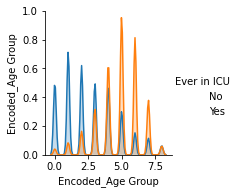

In [32]:
feature_class_distribution('Age Group', 'Ever in ICU')

Neighbourhood Name and Ever in ICU

            Neighbourhood Name  Encoded_Neighbourhood Name
0              Willowdale East                       129.0
2            Parkwoods-Donalda                        95.0
3        Church-Yonge Corridor                        23.0
5             Newtonbrook West                        86.0
6                     Milliken                        76.0
...                        ...                         ...
947   Humber Heights-Westmount                        53.0
994                     Rustic                       107.0
1003         Hillcrest Village                        52.0
1018                 Alderwood                         2.0
1059             Old East York                        93.0

[140 rows x 2 columns]


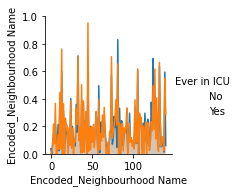

In [33]:
feature_class_distribution('Neighbourhood Name', 'Ever in ICU')

Source of Infection and Ever in ICU

                      Source of Infection  Encoded_Source of Infection
0                                  Travel                          8.0
13                              Community                          1.0
17         Outbreaks, Congregate Settings                          4.0
24                          Close Contact                          0.0
68                      Household Contact                          2.0
134                        No Information                          3.0
189    Outbreaks, Healthcare Institutions                          5.0
260             Outbreaks, Other Settings                          6.0
39842                             Pending                          7.0


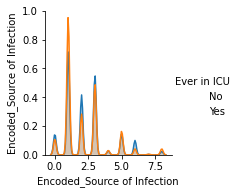

In [34]:
feature_class_distribution('Source of Infection', 'Ever in ICU')

Classification and Ever in ICU

   Classification  Encoded_Classification
0       CONFIRMED                     0.0
11       PROBABLE                     1.0


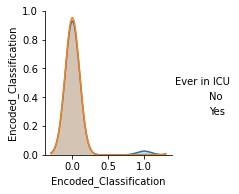

In [35]:
feature_class_distribution('Classification', 'Ever in ICU')

Episode Date and Ever in ICU

        Episode Date  Encoded_Episode Date
0                  1                   1.0
1                  0                   0.0
2                 15                   4.0
3                 26                   7.0
4                 30                   8.0
...              ...                   ...
166752           520                 494.0
166826           521                 495.0
166865           522                 496.0
166914           523                 497.0
166935           524                 498.0

[499 rows x 2 columns]


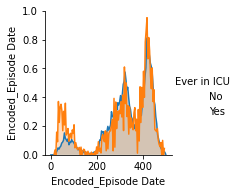

In [36]:
feature_class_distribution('Episode Date', 'Ever in ICU')

Reported Date and Ever in ICU

        Reported Date  Encoded_Reported Date
0                   0                    0.0
2                  29                    2.0
3                  33                    3.0
4                  34                    4.0
5                  35                    5.0
...               ...                    ...
166775            519                  489.0
166845            520                  490.0
166878            521                  491.0
166912            522                  492.0
166947            523                  493.0

[494 rows x 2 columns]


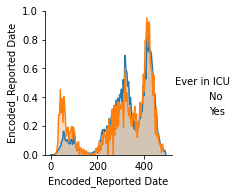

In [37]:
feature_class_distribution('Reported Date', 'Ever in ICU')

Client Gendera and Ever in ICU

                     Client Gender  Encoded_Client Gender
0                           FEMALE                    0.0
1                             MALE                    1.0
165                        UNKNOWN                    8.0
2660                         OTHER                    4.0
7651                   TRANSGENDER                    7.0
87588                   NON-BINARY                    2.0
120468                 TRANS WOMAN                    6.0
124748  NOT LISTED, PLEASE SPECIFY                    3.0
127497                   TRANS MAN                    5.0


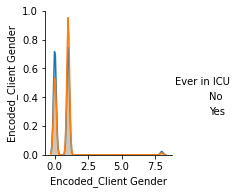

In [38]:
feature_class_distribution('Client Gender', 'Ever in ICU')

Outcome and Ever in ICU

        Outcome  Encoded_Outcome
0      RESOLVED              2.0
75        FATAL              1.0
21017    ACTIVE              0.0


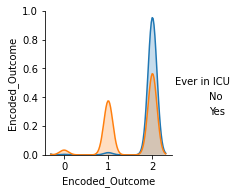

In [39]:
feature_class_distribution('Outcome', 'Ever in ICU')

# Ever Intubated

Outbreak Associated and Ever Intubated

    Outbreak Associated  Encoded_Outbreak Associated
0              Sporadic                          1.0
17  Outbreak Associated                          0.0


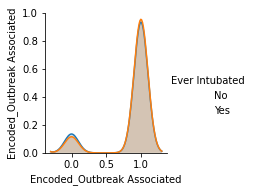

In [40]:
feature_class_distribution('Outbreak Associated', 'Ever Intubated')

Age Group and Ever Intubated

          Age Group  Encoded_Age Group
0    50 to 59 Years                4.0
2    20 to 29 Years                1.0
3    60 to 69 Years                5.0
6    80 to 89 Years                7.0
10   70 to 79 Years                6.0
13   30 to 39 Years                2.0
14   40 to 49 Years                3.0
28   19 and younger                0.0
258    90 and older                8.0


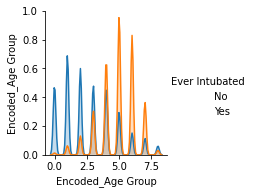

In [41]:
feature_class_distribution('Age Group', 'Ever Intubated')

Neighbourhood Name and Ever Intubated

            Neighbourhood Name  Encoded_Neighbourhood Name
0              Willowdale East                       129.0
2            Parkwoods-Donalda                        95.0
3        Church-Yonge Corridor                        23.0
5             Newtonbrook West                        86.0
6                     Milliken                        76.0
...                        ...                         ...
947   Humber Heights-Westmount                        53.0
994                     Rustic                       107.0
1003         Hillcrest Village                        52.0
1018                 Alderwood                         2.0
1059             Old East York                        93.0

[140 rows x 2 columns]


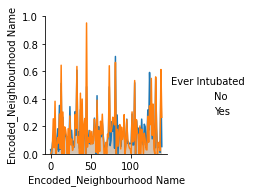

In [42]:
feature_class_distribution('Neighbourhood Name', 'Ever Intubated')

Source of Infection and Ever Intubated

                      Source of Infection  Encoded_Source of Infection
0                                  Travel                          8.0
13                              Community                          1.0
17         Outbreaks, Congregate Settings                          4.0
24                          Close Contact                          0.0
68                      Household Contact                          2.0
134                        No Information                          3.0
189    Outbreaks, Healthcare Institutions                          5.0
260             Outbreaks, Other Settings                          6.0
39842                             Pending                          7.0


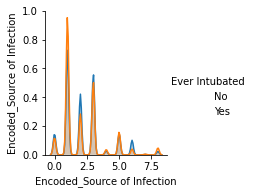

In [43]:
feature_class_distribution('Source of Infection', 'Ever Intubated')

Classification and Ever Intubated

   Classification  Encoded_Classification
0       CONFIRMED                     0.0
11       PROBABLE                     1.0


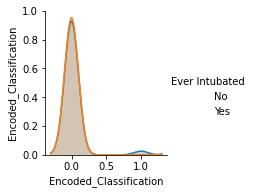

In [44]:
feature_class_distribution('Classification', 'Ever Intubated')

Episode Date and Ever Intubated

        Episode Date  Encoded_Episode Date
0                  1                   1.0
1                  0                   0.0
2                 15                   4.0
3                 26                   7.0
4                 30                   8.0
...              ...                   ...
166752           520                 494.0
166826           521                 495.0
166865           522                 496.0
166914           523                 497.0
166935           524                 498.0

[499 rows x 2 columns]


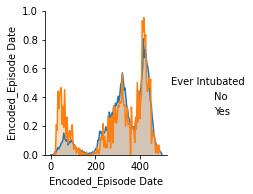

In [45]:
feature_class_distribution('Episode Date', 'Ever Intubated')

Reported Date and Ever Intubated

        Reported Date  Encoded_Reported Date
0                   0                    0.0
2                  29                    2.0
3                  33                    3.0
4                  34                    4.0
5                  35                    5.0
...               ...                    ...
166775            519                  489.0
166845            520                  490.0
166878            521                  491.0
166912            522                  492.0
166947            523                  493.0

[494 rows x 2 columns]


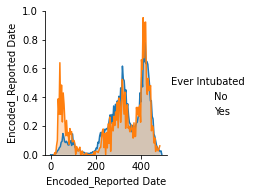

In [46]:
feature_class_distribution('Reported Date', 'Ever Intubated')

Client Gender and Ever Intubated

                     Client Gender  Encoded_Client Gender
0                           FEMALE                    0.0
1                             MALE                    1.0
165                        UNKNOWN                    8.0
2660                         OTHER                    4.0
7651                   TRANSGENDER                    7.0
87588                   NON-BINARY                    2.0
120468                 TRANS WOMAN                    6.0
124748  NOT LISTED, PLEASE SPECIFY                    3.0
127497                   TRANS MAN                    5.0


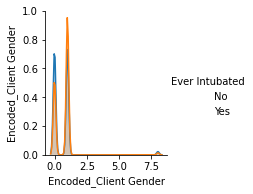

In [47]:
feature_class_distribution('Client Gender', 'Ever Intubated')

Outcome and Ever Intubated

        Outcome  Encoded_Outcome
0      RESOLVED              2.0
75        FATAL              1.0
21017    ACTIVE              0.0


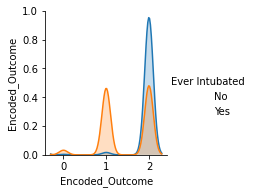

In [48]:
feature_class_distribution('Outcome', 'Ever Intubated')